In [85]:
import numpy as np
import matplotlib.pyplot as pl
from scipy.signal import correlate
import sys
sys.path.append('../')
import util
from data import bscan_rxList
import scipy

In [91]:
bscan_pseudo = bscan_rxList()
bscan_pseudo.load_sim('testing/guliya_pseudo_230413_114218.h5')
#bscan_pseudo.load_sim('/media/alex/WD_AK/paraPropPython_output/GA_analysis/gul_230216_171813/')
nprof_over, zprof_over = util.get_profile_from_file('share/aletsch/n_prof_PS.txt')
print(nprof_over)

[1.423 1.477 1.422 1.446 1.362 1.318 1.343 1.33  1.441 1.542 1.211 1.384
 1.396]


In [100]:
def create_profile(zprof_out, nprof_genes, zprof_genes, nprof_override, zprof_override):
    """
    This functions creates ref-index profiles in GA
    -It combines a smoothing algorithm for the Evolving Genes
    with a fixed profile that is not acted on by the algorithm
    zprof_out : Depth Values of Output Profile
    nprof_genes :
    """
    dz = zprof_out[1] - zprof_out[0]
    nDepths = len(zprof_out)
    nprof_out = np.ones(nDepths)

    zmin_2 = min(zprof_genes)
    zmax_2 = max(zprof_genes)
    ii_min2 = util.findNearest(zprof_out, zmin_2)

    #sp = csaps.UnivariateCubicSmoothingSpline(zprof_genes, nprof_genes, smooth=0.85)
    spi = scipy.interpolate.UnivariateSpline(zprof_genes, nprof_genes, s=0)
    zprof_2 = zprof_out[ii_min2:]
    nprof_2 = spi(zprof_2)

    nprof_out[ii_min2:] = nprof_2

    zmax_1 = max(zprof_override)
    ii_cut = util.findNearest(zprof_out, zmax_1)
    # zprof_1 = zprof_genes[:ii_cut]
    nDepths_1 = ii_cut
    nprof_1, zprof_1 = util.do_interpolation_same_depth(zprof_in=zprof_override, nprof_in=nprof_override, N=nDepths_1)
    '''
    nprof_out[:ii_cut] = nprof_1
    spi_2 = scipy.interpolate.UnivariateSpline(zprof_out, nprof_out, s=0)
    nprof_out = spi_2(zprof_out)
    '''
    nprof_list = []
    zprof_list = []
    for i in range(len(zprof_1)):
        nprof_list.append(nprof_1[i])
        zprof_list.append(zprof_1[i])
    for j in range(len(zprof_2)):
        if zprof_2[j] > max(zprof_1):
            nprof_list.append(nprof_2[j])
            zprof_list.append(zprof_2[j])
            #print(zprof_2[j],nprof_2[j])
    spi_2 = scipy.interpolate.UnivariateSpline(zprof_list, nprof_list,s=0.01)
    nprof_out = spi_2(zprof_out)

    return nprof_out

1.0 25.0 1.0


/home/alex/anaconda3/envs/myenv/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


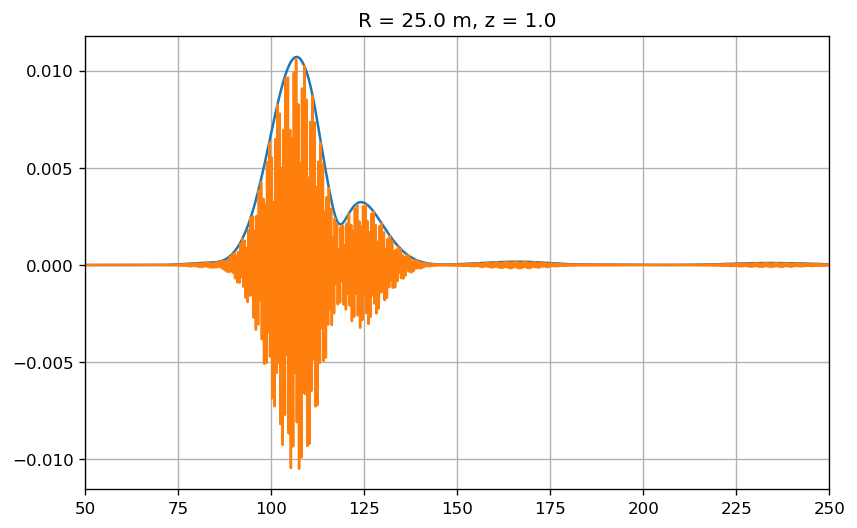

1.2811404359319776
3.5 25.0 3.5


/home/alex/anaconda3/envs/myenv/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


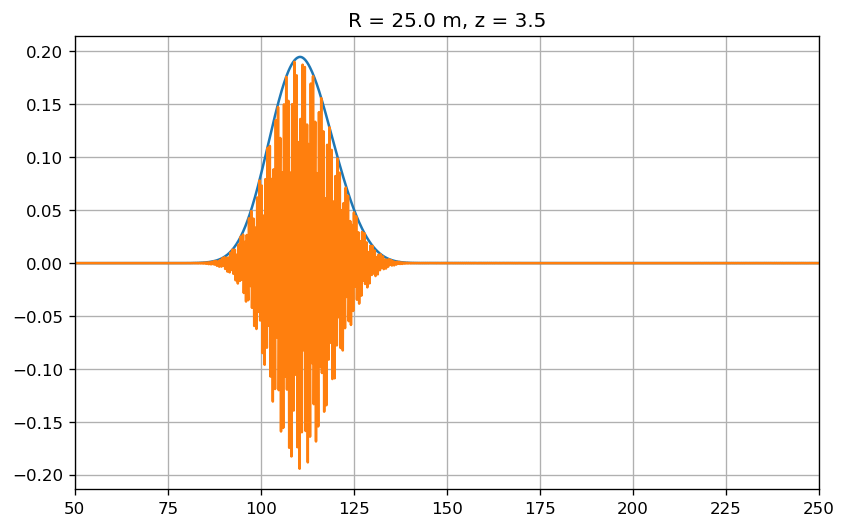

1.3267240844014674
6.0 25.0 6.0


/home/alex/anaconda3/envs/myenv/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


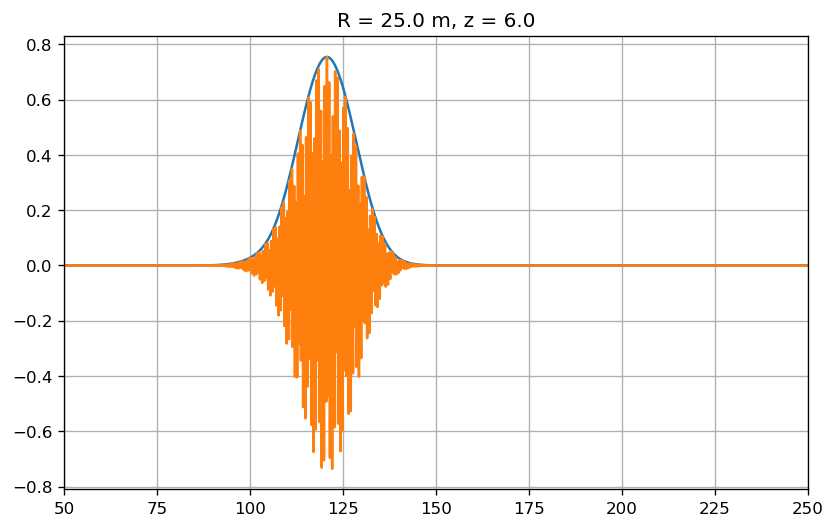

1.4466810540580202
8.5 25.0 8.5


/home/alex/anaconda3/envs/myenv/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


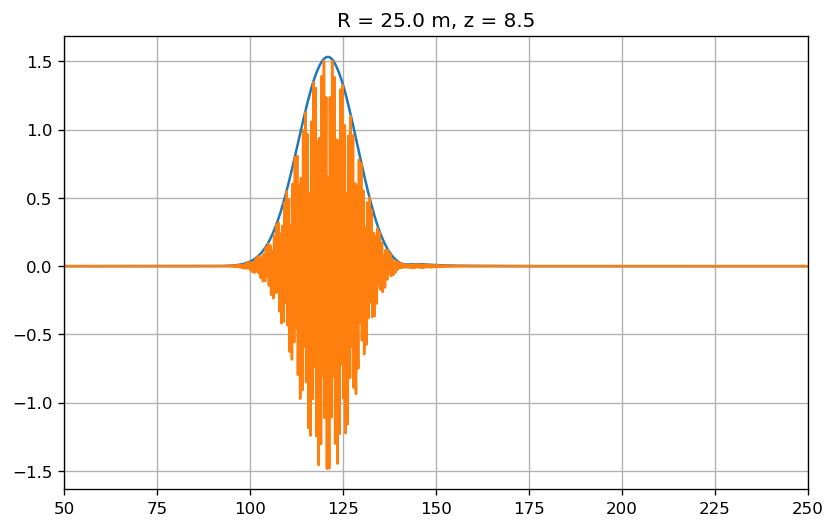

1.4490801934511512
11.0 25.0 11.0


/home/alex/anaconda3/envs/myenv/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


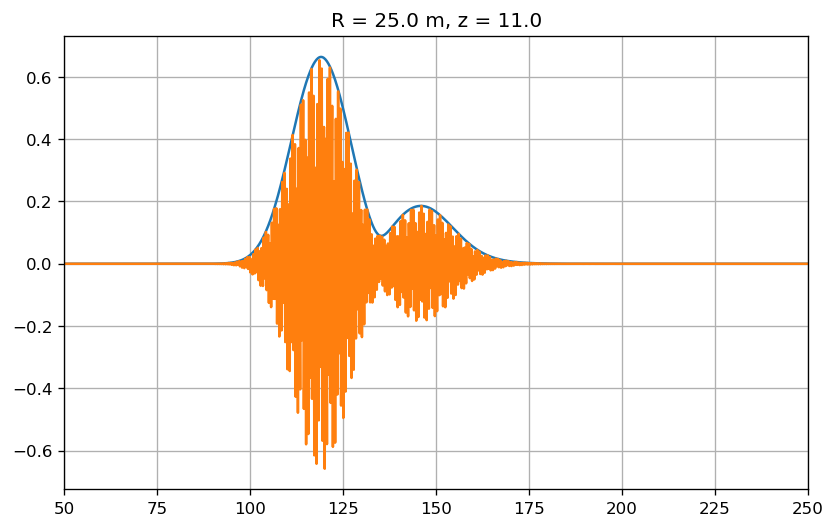

1.4274879389129718
13.5 25.0 13.5


/home/alex/anaconda3/envs/myenv/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


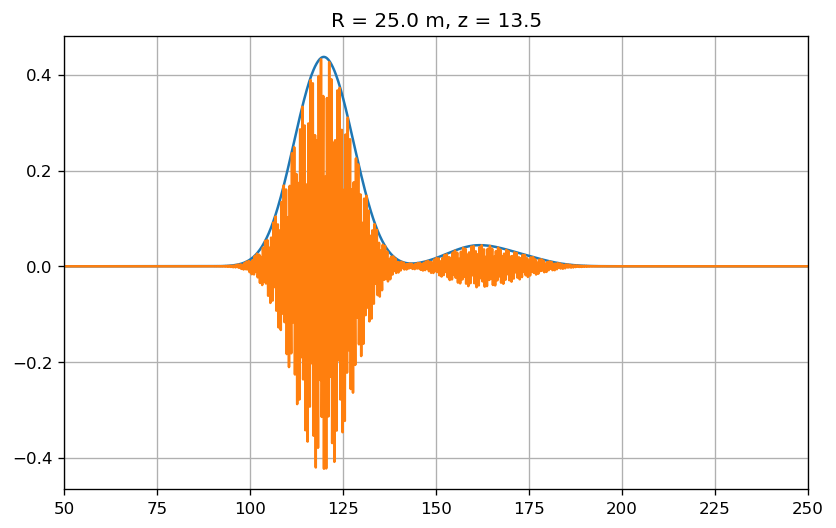

1.4370844964854959


In [101]:
tx_depths = bscan_pseudo.tx_depths
rxList = bscan_pseudo.rxList
rx_x_list = []
rx_z_list = []
nTX = len(tx_depths)
nRX = len(rxList)
tx_signal = bscan_pseudo.tx_signal
tspace = bscan_pseudo.tspace
tmax = max(tspace)
for j in range(nRX):
    rx_j = rxList[j]
    rx_x_list.append(rx_j.x)
    rx_z_list.append(rx_j.z)
    

'''
for i in range(nTX):
    tx_z = tx_depths[i]
    for j in range(nRX):
        rx_ij = rxList[j]
        rx_x_list.append
'''

rx_ranges = np.unique(rx_x_list)
rx_depths = np.unique(rx_z_list)

nRanges = len(rx_ranges)

ascan_list = []
profile_list = []
for k in range(1):
    R = rx_ranges[k]
    
    ind_list = []
    rxList_k = []
    txList_k = []
    rxDepths_k = []
    for i in range(nTX):
        for j in range(nRX):
            rx_j = rxList[j]
            tx_z_i = tx_depths[i]
            if ((tx_z_i - rx_j.z) == 0) and (rx_j.x == R):
                ind_list.append(j)
                rxList_k.append(rx_j)
                txList_k.append(tx_z_i)
    nRX_k = len(rxList_k)
    for i in range(nRX_k):
        rx_i = rxList_k[i]
        tx_z = txList_k[i]
        rxDepths_k.append(rx_i.z)
        print(tx_z, rx_i.x, rx_i.z)
        
        jj_rx = ind_list[i]
        ii_tx = util.findNearest(tx_depths, tx_z)
        
        ascan_i = bscan_pseudo.get_ascan(ii_tx, jj_rx)
        ascan_list.append(ascan_i)
        sig_correl0 = correlate(ascan_i, tx_signal.pulse)

        sig_correl = abs(correlate(ascan_i, tx_signal.pulse))
        nLag = len(sig_correl)
        tspace_lag = np.linspace(-tmax, tmax, nLag)
        j_cut = util.findNearest(0, tspace_lag)
        tspace_cut = tspace_lag[j_cut:]
        sig_correl_cut = sig_correl[j_cut:]
        sig_correl0_cut = sig_correl0[j_cut:]

        
        pl.figure(figsize=(8,5),dpi=120)
        pl.title('R = ' + str(R) + ' m, z = ' + str(tx_z))
        pl.plot(tspace_cut, sig_correl_cut)
        pl.plot(tspace_cut, sig_correl0_cut)
        pl.xlim(50,250)
        pl.grid()
        pl.show()
        
        jj_max = np.argmax(sig_correl_cut)
        t_max = tspace_cut[jj_max]
        
        n_max = util.c_light*t_max/R
        print(n_max)
        profile_list.append(n_max)

/home/alex/anaconda3/envs/myenv/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


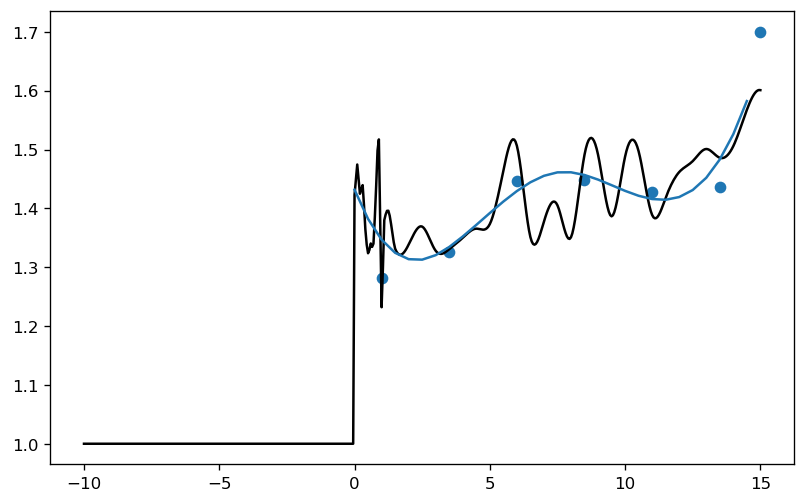

In [103]:
n_profile_in = bscan_pseudo.n_profile
bscan_pseudo.z_profile

pl.figure(figsize=(8,5),dpi=120)
pl.scatter(rxDepths_k, profile_list)
pl.plot(bscan_pseudo.z_profile, n_profile_in,c='k')

rxDepths_k.append(15)
profile_list.append(1.7)
zprof_genes0 = rxDepths_k
nprof_genes0 = profile_list

from scipy.interpolate import interp1d
zprof_genes = np.arange(min(zprof_genes0), 15, 0.5)
f_interp = interp1d(zprof_genes0, nprof_genes0)
nprof_genes = f_interp(zprof_genes)
zprof = np.arange(0, max(zprof_genes0), 0.5)
nprof=create_profile(zprof, nprof_genes=nprof_genes, zprof_genes=zprof_genes, nprof_override=nprof_over, zprof_override=zprof_over)

pl.plot(zprof, nprof)
pl.show()
